In [7]:
import requests
import pandas as pd
from io import StringIO

url = "https://ko.wikipedia.org/wiki/2021%EB%85%84_%EA%B0%80%EC%98%A8_%EB%94%94%EC%A7%80%ED%84%B8_%EC%B0%A8%ED%8A%B8_1%EC%9C%84_%EB%AA%A9%EB%A1%9D"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/115.0 Safari/537.36"}

resp = requests.get(url, headers=headers)
resp.raise_for_status()             # 상태 코드 확인 (예외 발생 시 중단)
# pandas.read_html treats a raw string as a filename; wrap HTML in StringIO to parse it as content
tables = pd.read_html(StringIO(resp.text))    # requests로 받은 HTML을 판다스로 파싱
print(len(tables))
print(tables[0].head())  # 첫 번째 테이블의 상위 5개 행 출력

4
    주간                                      노래                            가수  \
0  1주차  VVS (Feat. JUSTHIS) (Prod. GroovyRoom)  미란이, 먼치맨, Khundi Panda, 머쉬베놈   
1  2주차  VVS (Feat. JUSTHIS) (Prod. GroovyRoom)  미란이, 먼치맨, Khundi Panda, 머쉬베놈   
2  3주차                           밤하늘의 별을(2020)                            경서   
3  4주차                           밤하늘의 별을(2020)                            경서   
4  5주차                               Celebrity                           아이유   

        가온 지수   출처  
0  22975438.0  [1]  
1  20957089.0  [2]  
2  20020937.0  [3]  
3  19633972.0  [4]  
4  37342155.0  [5]  


In [9]:
import requests
import pandas as pd
from io import StringIO

url = "https://ko.wikipedia.org/wiki/2021%EB%85%84_%EA%B0%80%EC%98%A8_%EB%94%94%EC%A7%80%ED%84%B8_%EC%B0%A8%ED%8A%B8_1%EC%9C%84_%EB%AA%A9%EB%A1%9D"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/115.0 Safari/537.36"}

resp = requests.get(url, headers=headers)
resp.raise_for_status()             # 상태 코드 확인 (예외 발생 시 중단)
# pandas.read_html treats a raw string as a filename; wrap HTML in StringIO to parse it as content
tables = pd.read_html(StringIO(resp.text))    # requests로 받은 HTML을 판다스로 파싱

a = pd.DataFrame(tables[0])
song = a["노래"]

name = song[0]
nlist = []  # 노래 제목을 담을 리스트
clist = []  # 노래 제목의 카운트를 담을 리스트
cnt = 1

for i in range(1, len(song)):
    if name == song[i]:
        cnt += 1
    elif name != song[i]:
        if name in nlist:   # 이미 노래 제목이 리스트에 존재하는 경우
            for j in range(len(nlist)): # 노래 제목이 존재하는 위치를 찾아서 카운트 증가
                if name == nlist[j]: # 노래 제목이 존재하는 위치를 찾음
                    clist[j] += cnt # 기존 카운트에 현재 카운트를 더함
            cnt = 1
            name = song[i] # 다음 노래 제목으로 변경
        else:
            nlist.append(name) # 노래 제목이 리스트에 존재하지 않는 경우, 리스트에 추가
            clist.append(cnt) # 카운트도 리스트에 추가
            cnt = 1 
            name = song[i] # 다음 노래 제목으로 변경
    if i == len(song)-1: # 마지막 노래 제목 처리
        nlist.append(name) # 마지막 노래 제목을 리스트에 추가
        clist.append(cnt) # 마지막 노래 제목의 카운트도 리스트에 추가

for i in range(len(nlist)): # 노래 제목과 카운트를 출력
    print(nlist[i], clist[i])

VVS (Feat. JUSTHIS) (Prod. GroovyRoom) 2
밤하늘의 별을(2020) 2
Celebrity 6
별빛 같은 나의 사랑아 1
롤린 (Rollin') 5
라일락 2
Antidote 1
맛 (Hot Sauce) 1
Dun Dun Dance 1
Butter 5
바라만 본다 5
낙하 (with 아이유) 1
신호등 3
Stay 6
사랑은 늘 도망가 1
strawberry moon 3
쉬어 (Feat. MINO) (Prod. GRAY) 1
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom) 2
리무진 (Feat. MINO) (Prod. GRAY) 2
Counting Stars (Feat. Beenzino) 2
nan 1


In [13]:
import requests
import pandas as pd
from io import StringIO

url = "https://ko.wikipedia.org/wiki/2021%EB%85%84_%EA%B0%80%EC%98%A8_%EB%94%94%EC%A7%80%ED%84%B8_%EC%B0%A8%ED%8A%B8_1%EC%9C%84_%EB%AA%A9%EB%A1%9D"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/115.0 Safari/537.36"}

resp = requests.get(url, headers=headers)
resp.raise_for_status()             # 상태 코드 확인 (예외 발생 시 중단)
tables = pd.read_html(StringIO(resp.text))    # requests로 받은 HTML을 판다스로 파싱

a = pd.DataFrame(tables[0])
song = a["노래"]

name = song[0]
nlist = []  # 노래 제목을 담을 리스트
clist = []  # 노래 제목의 카운트를 담을 리스트
cnt = 1
max = 0
max_num = 0

for i in range(1, len(song)):
    if name == song[i]:
        cnt += 1
    elif name != song[i]:
        if name in nlist:   # 이미 노래 제목이 리스트에 존재하는 경우
            for j in range(len(nlist)): # 노래 제목이 존재하는 위치를 찾아서 카운트 증가
                if name == nlist[j]: # 노래 제목이 존재하는 위치를 찾음
                    clist[j] += cnt # 기존 카운트에 현재 카운트를 더함
            cnt = 1
            name = song[i] # 다음 노래 제목으로 변경
        else:
            nlist.append(name) # 노래 제목이 리스트에 존재하지 않는 경우, 리스트에 추가
            clist.append(cnt) # 카운트도 리스트에 추가
            cnt = 1 
            name = song[i] # 다음 노래 제목으로 변경
    if i == len(song)-1: # 마지막 노래 제목 처리
        nlist.append(name) # 마지막 노래 제목을 리스트에 추가
        clist.append(cnt) # 마지막 노래 제목의 카운트도 리스트에 추가

for i in range(len(nlist)): # 노래 제목과 카운트를 출력
    # print(nlist[i], clist[i])
    if max < clist[i]: # 가장 많이 나온 노래 제목과 카운트를 저장
        max = clist[i]
        max_num = i
    # print(max_num)

print(f"최고 많이 1위를 한 곡은 {nlist[max_num]}이고 곡은 {clist[max_num]}번 등장했습니다.")

최고 많이 1위를 한 곡은 Celebrity이고 곡은 6번 등장했습니다.


#### 그래프 표시 및 분석

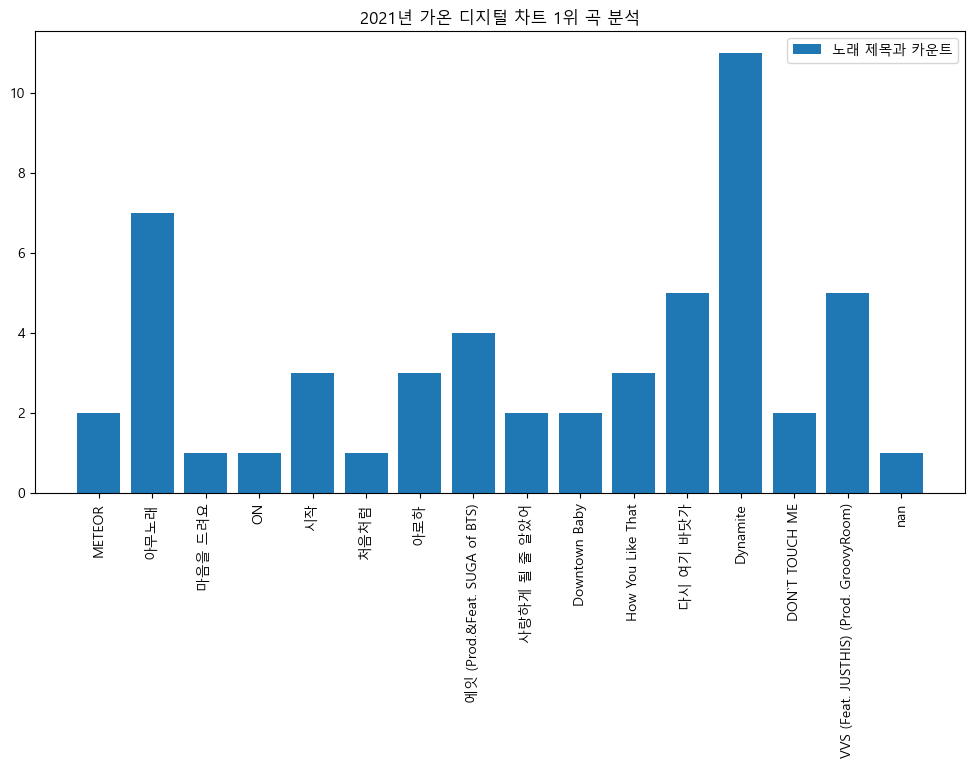

In [ ]:
from pyparsing import line
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

url = "https://ko.wikipedia.org/wiki/2021%EB%85%84_%EA%B0%80%EC%98%A8_%EB%94%94%EC%A7%80%ED%84%B8_%EC%B0%A8%ED%8A%B8_1%EC%9C%84_%EB%AA%A9%EB%A1%9D"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 Chrome/115.0 Safari/537.36"}

resp = requests.get(url, headers=headers)
resp.raise_for_status()             # 상태 코드 확인 (예외 발생 시 중단)
tables = pd.read_html(StringIO(resp.text))    # requests로 받은 HTML을 판다스로 파싱

a = pd.DataFrame(tables[0])
song = a["노래"]

name = song[0]
nlist = []  # 노래 제목을 담을 리스트
clist = []  # 노래 제목의 카운트를 담을 리스트
cnt = 1
max = 0
max_num = 0

for i in range(1, len(song)):
    if name == song[i]:
        cnt += 1
    elif name != song[i]:
        if name in nlist:   # 이미 노래 제목이 리스트에 존재하는 경우
            for j in range(len(nlist)): # 노래 제목이 존재하는 위치를 찾아서 카운트 증가
                if name == nlist[j]: # 노래 제목이 존재하는 위치를 찾음
                    clist[j] += cnt # 기존 카운트에 현재 카운트를 더함
            cnt = 1
            name = song[i] # 다음 노래 제목으로 변경
        else:
            nlist.append(name) # 노래 제목이 리스트에 존재하지 않는 경우, 리스트에 추가
            clist.append(cnt) # 카운트도 리스트에 추가
            cnt = 1 
            name = song[i] # 다음 노래 제목으로 변경
    if i == len(song)-1: # 마지막 노래 제목 처리
        nlist.append(name) # 마지막 노래 제목을 리스트에 추가
        clist.append(cnt) # 마지막 노래 제목의 카운트도 리스트에 추가

for i in range(len(nlist)): # 노래 제목과 카운트를 출력
    # print(nlist[i], clist[i])
    if max < clist[i]: # 가장 많이 나온 노래 제목과 카운트를 저장
        max = clist[i]
        max_num = i
    # print(max_num)

plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.figure(figsize=(12, 6)) # 그래프 크기 설정
# Ensure x labels are strings (matplotlib category axis requires str/bytes)
nlist = [str(x) for x in nlist]
# Ensure counts are numeric floats for plotting
clist = [float(x) for x in clist]
# plt.plot(nlist, clist, marker='o', linestyle='--') # 노래 제목과 카운트를 선 그래프로 표시
plt.bar(nlist, clist) # 노래 제목과 카운트를 막대 그래프로 표시
plt.xticks(rotation=90) # x축 레이블을 90도 회전하여 표시
plt.legend(['노래 제목과 카운트']) # 범례 추가
plt.title('2021년 가온 디지털 차트 1위 곡 분석') # 그래프 제목 추가
# plt.tight_layout()
plt.show()